## Text Analytics - "20 News Groups"
### Team Members -
### Shikha Singh
### Yuvraj Goyal
### Ankit kumar Singh

## Importing Packages

In [0]:
import re    # for regular expressions
import nltk  # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

#### Downloading wordnet NLTK package

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## DATA LOADING

In [0]:
#Loading the 20 Newsgroup data set. Example loading the training data.
from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train', shuffle=True,remove=('headers', 'footers', 'quotes'))

#### remove should be a tuple containing any subset of ('headers', 'footers', 'quotes'), telling it to remove headers, signature blocks, and quotation blocks respectively to help clean the data from unwanted test such has "from".."to"..."email"

### Importing Training Data from 20NewsGorup

In [0]:
mydata_train_data =mydata_train.data
mydata_train_labels = mydata_train.target

### Importing Testing Data from 20NewsGorup

In [0]:
mydata_test=fetch_20newsgroups(subset='test',shuffle=True,remove=('headers', 'footers', 'quotes')) #loading test data
mydata_test_data=mydata_test.data 
mydata_test_labels=mydata_test.target

## DATA INSPECTION

In [0]:
# printing all target names - article names in our dataset
mydata_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
#prints first line of the first data file
print("\n".join(mydata_train.data[0].split("\n")[:3])) 

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,


In [0]:
#checking the type
type(mydata_train)

sklearn.datasets.base.Bunch

In [0]:
print(mydata_train.keys()) # number of columns in our dataset

dict_keys(['target', 'data', 'DESCR', 'filenames', 'description', 'target_names'])


In [0]:
mydata_train.filenames

array(['C:\\Users\\singh\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       'C:\\Users\\singh\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       'C:\\Users\\singh\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       ...,
       'C:\\Users\\singh\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695',
       'C:\\Users\\singh\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38319',
       'C:\\Users\\singh\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104440'],
      dtype='<U95')

In [0]:
# Checking the shape of our traing data
print(mydata_train.filenames.shape, mydata_train.target.shape) 

(11314,) (11314,)


In [0]:
print ("Total Number of Training data: ",len(mydata_train_data))
print ("Total Number of Training Labels: ",len(mydata_train_labels))

Total Number of Training data:  11314
Total Number of Training Labels:  11314


In [0]:
print ("Total Number of Testing data: ",len(mydata_test_data))
print ("Total Number of Testing Labels: ",len(mydata_test_labels))

Total Number of Testing data:  7532
Total Number of Testing Labels:  7532


## Exploratory Analysis

In [0]:
# converting to dataframe for easier exploratory analysis

data=pd.DataFrame(mydata_train['data'])
target = pd.DataFrame(mydata_train['target'])
data.columns=['data']
data['target']=target
mydata_train_df = data

In [0]:
mydata_train_df[0:]

,data,target
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors...",7
1,A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top sp...,4
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\...",4
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - thi...",14
5,"\n\n\n\n\nOf course. The term must be rigidly defined in any bill.\n\n\nI doubt she uses this term for that. You are using a quote allegedly\nfrom her, can you back it up?\n\n\n\n\nI read the ar...",16
6,"There were a few people who responded to my request for info on\ntreatment for astrocytomas through email, whom I couldn't thank\ndirectly because of mail-bouncing probs (Sean, Debra, and Sharon)....",13
7,\nALL this shows is that YOU don't know much about SCSI.\n\nSCSI-1 {with a SCSI-1 controler chip} range is indeed 0-5MB/s\nand...,3
8,"I have win 3.0 and downloaded several icons and BMP's but I can't figure out\nhow to change the ""wallpaper"" or use the icons. Any help would be appreciated.\n\n\nThanx,\n\n-Brando",2
9,"\n\n\nI've had the board for over a year, and it does work with Diskdoubler,\nbut not with Autodoubler, due to a licensing problem with Stac Technologies,\nthe owners of the board's compression te...",4


#### Now we will check the distribution of length of the data, in terms of words in our dataset.

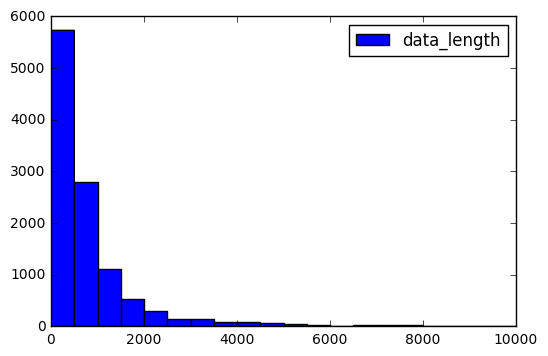

In [0]:
length_data = mydata_train_df['data'].str.len() #length of data

plt.hist(length_data, bins=20, label="data_length",range=[0,10000])
#plt.hist(length_test,  bins=20, label="test_tweets")
plt.legend() #to show legends
plt.show()

#### Distibution of categories in our dataset

In [0]:
mydata_train_df['target'].value_counts()

10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target, dtype: int64

## Data Processing

In [0]:
# creating a fucntion for initial data processing - handling extra characters, multiple spaces, capital case
def dataprocess(string):
    cleaned_str=re.sub("[^a-zA-Z]", " ",str(string))
    #cleaned_str=re.sub('[^a-z\s]+',' ',cleaned_str,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case    
    return cleaned_str
    
    

In [0]:
mydata_train_data = [dataprocess(str) for str in mydata_train_data]

In [0]:
mydata_test_data = [dataprocess(str) for str in mydata_test_data]

#### Lemmatizing the data in our dataset

In [0]:
# Importing port stemmer
from nltk.stem.porter import * 
stemmer = PorterStemmer()

In [0]:
# Tokenizing and lemmatizing

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
           
    return result

In [0]:
mydata_train_data =[preprocess(str) for str in mydata_train_data]

In [0]:
mydata_test_data =[preprocess(str) for str in mydata_test_data]

## Vectorization Methods - CountVectorizer

### BoW Representation of our data
- Takes in the text corpus, builds it’s term document matrix (i.e BoW), and returns it
- Every word is assigned a fixed unique integer id and value of each cell of this matrix represents the word count — BoW

In [0]:
## It is very important to remove stop words, accuaracy gets impacted if stop words not removed

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
count_vect = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False,stop_words='english') 
mydata_train_count = count_vect.fit_transform(mydata_train_data)
print (mydata_train_count.shape)

(11314, 47349)


## Vectorizer Methods - TF-IDF

In [0]:
tfidf_vect = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False,stop_words='english')
mydata_train_count_tf = tfidf_vect.fit_transform(mydata_train_data)
print (mydata_train_count_tf.shape)

(11314, 47349)


C:\Users\singh\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [0]:
tfidf_features=tfidf_vect.get_feature_names() # seeing features of TFIDF

## Modelling

### NAIVE BAYES MODEL

#### Running Naive Bayes model for a start - Count Vect

In [0]:
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB()
nb.fit(mydata_train_count, mydata_train_labels)  #calling the fit

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predicted_train=nb.predict(mydata_train_count) 
print ("Train Set Accuracy : ",np.sum(predicted_train==mydata_train_labels)/float(len(predicted_train)))

Train Set Accuracy :  0.8077602969771964


#### NB on training dataset using TFIDF

In [0]:
from sklearn.naive_bayes import MultinomialNB 
nb_tf = MultinomialNB()
nb_tf.fit(mydata_train_count_tf, mydata_train_labels) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
nb_tf.fit(mydata_train_count_tf, mydata_train_labels)
predicted_train_tf=nb_tf.predict(mydata_train_count_tf)
print ("Train Set Accuracy : ",np.sum(predicted_train_tf==mydata_train_labels)/float(len(predicted_train_tf)))

Train Set Accuracy :  0.8381651051794238


#### As we can see TF-IDF performs better than Count vectorizer, looking into classification_report of NB with TFIDF

In [0]:
print(classification_report(mydata_train_labels, predicted_train_tf))

             precision    recall  f1-score   support

          0       0.93      0.57      0.71       480
          1       0.89      0.82      0.85       584
          2       0.88      0.79      0.83       591
          3       0.76      0.86      0.81       590
          4       0.91      0.81      0.86       578
          5       0.86      0.94      0.90       593
          6       0.88      0.83      0.85       585
          7       0.93      0.84      0.88       594
          8       0.95      0.88      0.92       598
          9       0.97      0.90      0.93       597
         10       0.63      0.96      0.76       600
         11       0.81      0.93      0.87       595
         12       0.91      0.83      0.87       591
         13       0.95      0.93      0.94       594
         14       0.94      0.92      0.93       593
         15       0.54      0.97      0.69       599
         16       0.85      0.91      0.88       546
         17       0.90      0.92      0.91   

#### NB on testing Dataset using count vectorizer

In [0]:
mydata_test_count=count_vect.transform(mydata_test_data) #transforms test data to numerical form
print (mydata_test_count.shape)

(7532, 47349)


In [0]:
predicted=nb.predict(mydata_test_count) #simply call the predict function to predict for test set
print ("Test Set Accuracy : ",np.sum(predicted==mydata_test_labels)/float(len(predicted)))

Test Set Accuracy :  0.6283855549654807


#### NB on test dataset using TFIDF

In [0]:
mydata_test_count_tf = tfidf_vect.transform(mydata_test_data)

C:\Users\singh\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [0]:
predicted_tf=nb_tf.predict(mydata_test_count_tf) #simply call the predict function to predict for test set
print ("Test Set Accuracy : ",np.sum(predicted_tf==mydata_test_labels)/float(len(predicted_tf)))

Test Set Accuracy :  0.6524163568773235


In [0]:
print(classification_report(mydata_test_labels, predicted_tf))

             precision    recall  f1-score   support

          0       0.68      0.18      0.29       319
          1       0.65      0.66      0.66       389
          2       0.65      0.51      0.57       394
          3       0.54      0.70      0.61       392
          4       0.72      0.56      0.63       385
          5       0.74      0.76      0.75       395
          6       0.78      0.72      0.75       390
          7       0.81      0.70      0.75       396
          8       0.86      0.67      0.76       398
          9       0.91      0.77      0.83       397
         10       0.56      0.92      0.70       399
         11       0.57      0.79      0.66       396
         12       0.65      0.53      0.58       393
         13       0.83      0.75      0.79       396
         14       0.75      0.74      0.74       394
         15       0.37      0.92      0.53       398
         16       0.55      0.69      0.62       364
         17       0.78      0.79      0.79   

### SGD Classifier - Training and Test Data set using count_vectorizer

In [0]:
svm_cv = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=10, random_state=42)
svm_cv.fit(mydata_train_count, mydata_train_labels) 

svm_cv.fit(mydata_train_count, mydata_train_labels)
predicted_train_cv = svm_cv.predict(mydata_train_count)
print ("Train Set Accuracy : ",np.sum(predicted_train_cv==mydata_train_labels)/float(len(predicted_train_cv)))

predicted_cv=svm_cv.predict(mydata_test_count) #simply call the predict function to predict for test set
print ("Test Set Accuracy : ",np.sum(predicted_cv==mydata_test_labels)/float(len(predicted_cv)))

Train Set Accuracy :  0.8939367155736256
Test Set Accuracy :  0.5938661710037175


### SGD Classifier - Training and Test Data set using TFIDF_vectorizer

In [0]:
svm_tf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=10, random_state=42)
svm_tf.fit(mydata_train_count_tf, mydata_train_labels) 

svm_tf.fit(mydata_train_count_tf, mydata_train_labels)
predicted_train_tf = svm_tf.predict(mydata_train_count_tf)
print ("Train Set Accuracy : ",np.sum(predicted_train_tf==mydata_train_labels)/float(len(predicted_train_tf)))

predicted_tf=svm_tf.predict(mydata_test_count_tf) #simply call the predict function to predict for test set
print ("Test Set Accuracy : ",np.sum(predicted_tf==mydata_test_labels)/float(len(predicted_tf)))

Train Set Accuracy :  0.8845677921159625
Test Set Accuracy :  0.6594530005310675


#### As we can see, SGD with TF-IDF classifier faitly performs better than Count vectorizer. Moving ahead, we will be using Cross validation to tune the model further

In [0]:
from sklearn.grid_search import GridSearchCV
parameters = {'penalty': ["l1","l2"],
               'n_iter': [5,10,20,50,100],
               'alpha': (0.1,0.01, 0.001),
 }

In [0]:
gs_clf = GridSearchCV(svm_tf, parameters)
gs_clf = gs_clf.fit(mydata_train_count_tf, mydata_train_labels)

In [0]:
gs_clf.best_params_

{'alpha': 0.001, 'n_iter': 20, 'penalty': 'l2'}

#### Using best parameters and predicting again

In [0]:
svm_tf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=20, random_state=42)
svm_tf.fit(mydata_train_count_tf, mydata_train_labels) 

svm_tf.fit(mydata_train_count_tf, mydata_train_labels)
predicted_train_tf = svm_tf.predict(mydata_train_count_tf)
print ("Train Set Accuracy : ",np.sum(predicted_train_tf==mydata_train_labels)/float(len(predicted_train_tf)))

predicted_tf=svm_tf.predict(mydata_test_count_tf) #simply call the predict function to predict for test set
print ("Test Set Accuracy : ",np.sum(predicted_tf==mydata_test_labels)/float(len(predicted_tf)))

Train Set Accuracy :  0.8851864946084497
Test Set Accuracy :  0.6593202336696761


#### As we can see there is slight increase in training accuracy with the CV parameters.

### XGBoost Classifier - Training Data set using CountVectorizer

In [0]:
xgb_model_cv = XGBClassifier(max_depth=6, n_estimators=200).fit(mydata_train_count, mydata_train_labels) 
prediction = xgb_model_cv.predict(mydata_train_count) 



In [0]:
(accuracy_score(mydata_train_labels, prediction))*100

89.49089623475341

In [0]:
prediction_test = xgb_model_cv.predict(mydata_test_count)
(accuracy_score(mydata_test_labels, prediction_test))*100

62.65268189060011

### XGBClassifier tuning using Count vectorizer - Cross Validation

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [0]:
model = XGBClassifier()
n_estimators = range(100, 400, 100)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(mydata_train_count, mydata_train_labels)

In [0]:
grid_search.best_params_

{'n_estimators': 300}

In [0]:
xgb_new=grid_result 

In [0]:
pred=xgb_new.predict(mydata_train_count) 

In [0]:
(accuracy_score(mydata_train_labels, pred))*100

83.3127099169171

In [0]:
pred_test = xgb_new.predict(mydata_test_count)
(accuracy_score(mydata_test_labels, pred_test))*100

62.559745087626126

### XGBoost Classifier - Training Data set using TF_IDF

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=200).fit(mydata_train_count_tf, mydata_train_labels) 
prediction = xgb_model.predict(mydata_train_count_tf) 


In [0]:
(accuracy_score(mydata_train_labels, prediction))*100

90.24217783277355

In [0]:
from sklearn.metrics import classification_report
print(classification_report(mydata_train_labels, prediction))

             precision    recall  f1-score   support

          0       0.92      0.90      0.91       480
          1       0.92      0.87      0.89       584
          2       0.92      0.88      0.90       591
          3       0.92      0.90      0.91       590
          4       0.93      0.88      0.90       578
          5       0.96      0.93      0.95       593
          6       0.90      0.93      0.91       585
          7       0.53      0.93      0.68       594
          8       0.93      0.88      0.90       598
          9       0.93      0.89      0.91       597
         10       0.96      0.91      0.93       600
         11       0.98      0.93      0.95       595
         12       0.91      0.88      0.89       591
         13       0.96      0.93      0.94       594
         14       0.95      0.90      0.92       593
         15       0.98      0.93      0.95       599
         16       0.96      0.91      0.93       546
         17       0.98      0.92      0.95   

### XGBoost Classifier - Testing Data set using TF_IDF

In [0]:
prediction_test = xgb_model.predict(mydata_test_count_tf)
(accuracy_score(mydata_test_labels, prediction_test))*100

58.85554965480616

In [0]:
print(classification_report(mydata_test_labels, prediction_test))

             precision    recall  f1-score   support

          0       0.45      0.42      0.44       319
          1       0.55      0.56      0.55       389
          2       0.55      0.53      0.54       394
          3       0.54      0.56      0.55       392
          4       0.59      0.55      0.57       385
          5       0.66      0.58      0.62       395
          6       0.67      0.70      0.68       390
          7       0.34      0.67      0.45       396
          8       0.69      0.64      0.66       398
          9       0.73      0.73      0.73       397
         10       0.79      0.77      0.78       399
         11       0.75      0.63      0.69       396
         12       0.46      0.48      0.47       393
         13       0.71      0.65      0.68       396
         14       0.69      0.64      0.66       394
         15       0.62      0.70      0.66       398
         16       0.50      0.50      0.50       364
         17       0.85      0.67      0.75   